In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

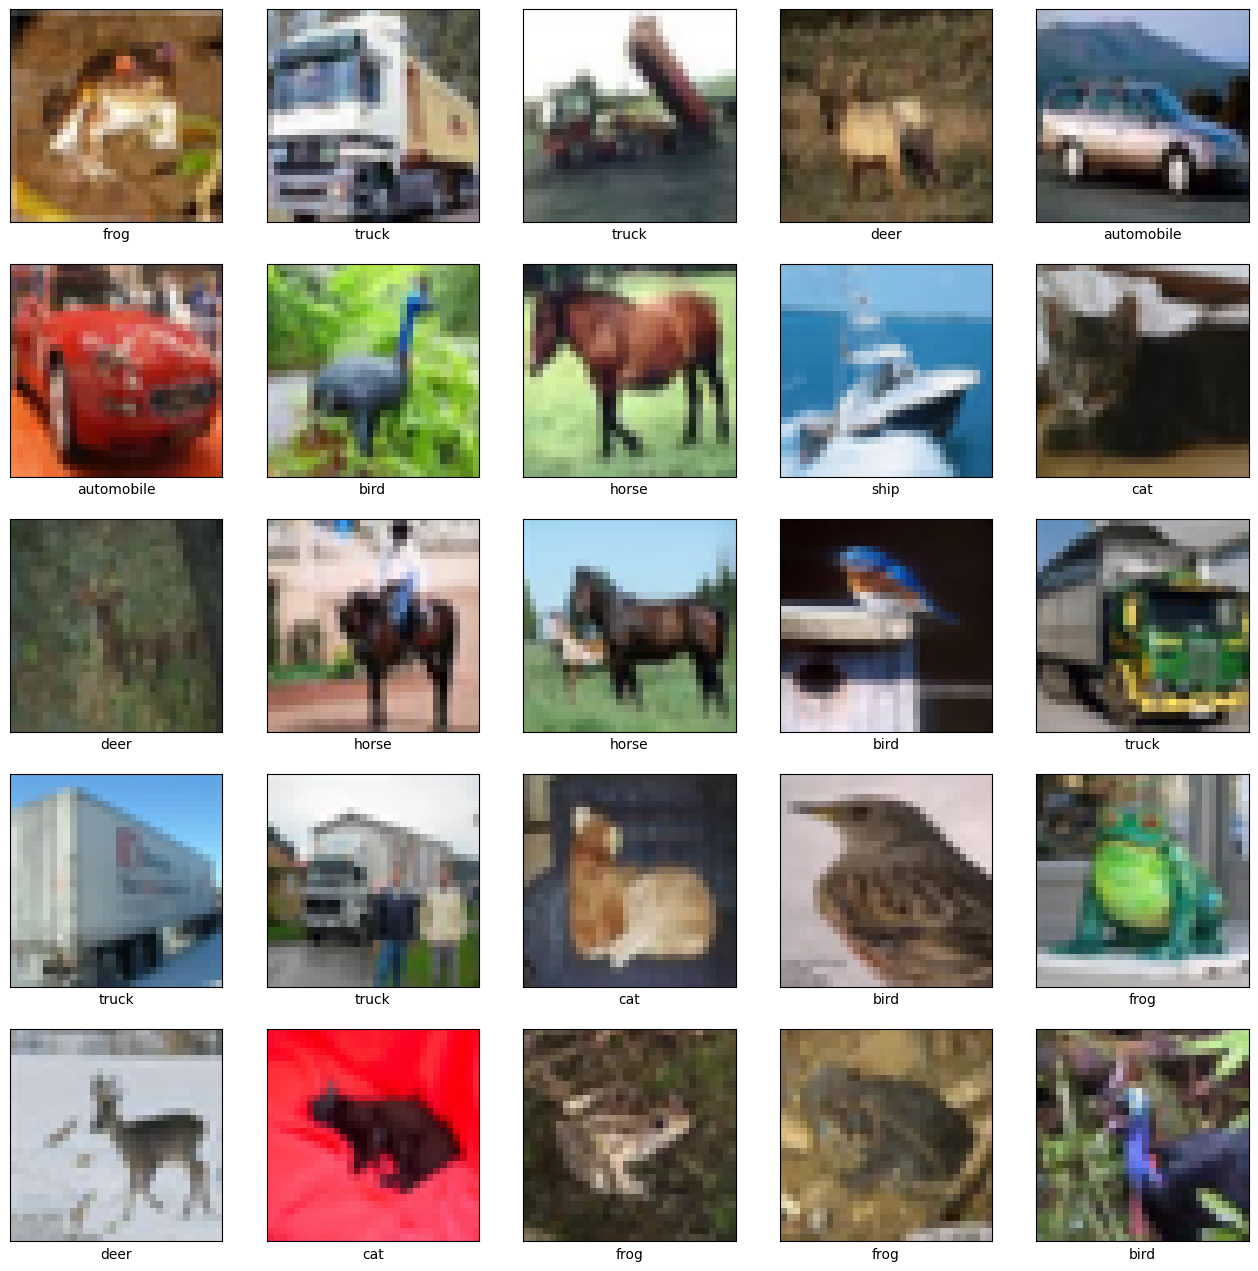

In [6]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(labels[train_labels[i][0]])

In [7]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [8]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [9]:
test_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [10]:
def process_image(image,label):
  image=tf.image.per_image_standardization(image)
  image=tf.image.resize(image,[64,64])
  return image,label

In [11]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train Size',train_ds_size)
print('Test size',test_ds_size)

Train Size 50000
Test size 10000


In [12]:
train_ds=(train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder = True))
test_ds=(test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size=32,drop_remainder = True))

Create AlexNet Architecture

In [13]:
model=Sequential([
    Conv2D(filters=128,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

In [16]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
1562/1562 [==============================] - 41s 9ms/step - loss: 2.1193 - accuracy: 0.2581 - val_loss: 1.5873 - val_accuracy: 0.4379
Epoch 2/10
1562/1562 [==============================] - 18s 8ms/step - loss: 1.6987 - accuracy: 0.3863 - val_loss: 1.4169 - val_accuracy: 0.4912
Epoch 3/10
1562/1562 [==============================] - 17s 8ms/step - loss: 1.5147 - accuracy: 0.4550 - val_loss: 1.2966 - val_accuracy: 0.5357
Epoch 4/10
1562/1562 [==============================] - 16s 8ms/step - loss: 1.3868 - accuracy: 0.5048 - val_loss: 1.2317 - val_accuracy: 0.5553
Epoch 5/10
1562/1562 [==============================] - 17s 8ms/step - loss: 1.2912 - accuracy: 0.5372 - val_loss: 1.1671 - val_accuracy: 0.5850
Epoch 6/10
1562/1562 [==============================] - 16s 8ms/step - loss: 1.2063 - accuracy: 0.5722 - val_loss: 1.1307 - val_accuracy: 0.5939
Epoch 7/10
1562/1562 [==============================] - 19s 9ms/step - loss: 1.1319 - accuracy: 0.6010 - val_loss: 1.0866 - val_ac

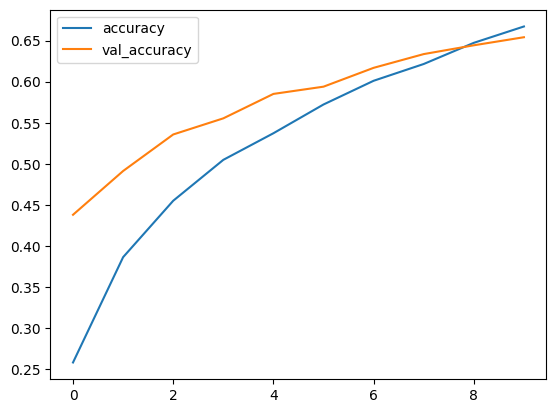

In [17]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()